In [34]:
import pandas as pd
import numpy as np

In [35]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [36]:
wine_raw = catalog.load('wine_raw_data')

[06/25/25 22:20:27] INFO     Loading data from wine_raw_data (CSVDataset)...                    ]8;id=370386;file:///Users/svengoerdes/Projects/Master/MLOps_Project/project/.venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=472391;file:///Users/svengoerdes/Projects/Master/MLOps_Project/project/.venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#403\403]8;;\

<Axes: xlabel='points'>

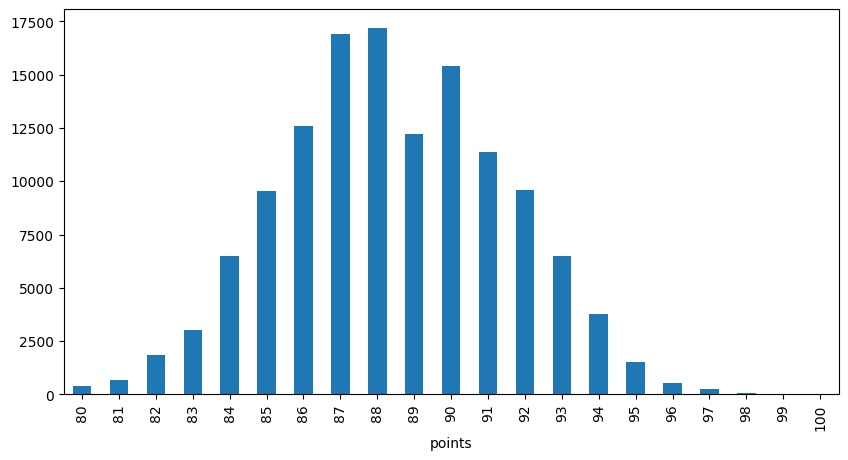

In [37]:
# lets look at the current distribution ofthe points
wine_raw['points'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))

In [38]:
wine_raw['points'].describe()


count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [39]:
# lets take a sample of the original data and shift the data ponts by - 20 
wine_sample = wine_raw.sample(1000, random_state=42)
# lets use a normal distrubtion to generate a new set of points
np.random.normal(loc = -5 ,scale = 3)

-6.162889497989739

In [40]:
data_shift = np.random.normal(loc = -10 ,scale = 3, size = 1000)
wine_sample['points'] = wine_sample['points'] + data_shift

In [ ]:
# make sure that every value is between [0, 100] -> if not this should get caught by great_expectations.
wine_sample.describe()


,points,price
count,1000.000000,941.000000
mean,78.498934,36.075452
std,4.457481,45.481205
min,67.137253,5.000000
25%,75.489114,18.000000
50%,78.615843,26.000000
75%,81.388411,41.000000
max,91.796469,973.000000


In [42]:
wine_sample

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
77718,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,67.195108,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station
67681,France,"A soft, almost off dry wine that is full in th...",Réserve,74.551916,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins
69877,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,68.897567,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza
46544,US,This is the winery's best Nebula in years. Whi...,Nebula,78.061312,29.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight
186,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,75.062099,40.0,California,Anderson Valley,NaN,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106095,US,"Fruity in blackberry and cherry flavors, this ...",NaN,71.963059,9.0,California,Alexander Valley,Sonoma,NaN,NaN,Kirkland Signature 2009 Cabernet Sauvignon (Al...,Cabernet Sauvignon,Kirkland Signature
66315,US,"Very crisp and slightly sweet, this simple, ev...",NaN,72.558277,10.0,California,Monterey County,Central Coast,NaN,NaN,Tre 2008 Chardonnay (Monterey County),Chardonnay,Tre
43282,US,"This is a soft vineyard-designate, approachabl...",Bacigalupi Vineyard,69.375324,44.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Gracianna 2014 Bacigalupi Vineyard Zinfandel (...,Zinfandel,Gracianna
4577,France,"The Birot estate is in Cadillac, the fortress ...",NaN,71.527753,18.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,Château de Birot 2015 Bordeaux Blanc,Bordeaux-style White Blend,Château de Birot


In [43]:
# save this new data_sample with new distribution to winemag-data-datadrift
wine_sample.to_csv('../data/01_raw/winemag_data_drift.csv')